In [1]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt

In [2]:
try:
    with open("../config.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("Configuration file not found")

In [3]:
config

{'input_data': {'file': '../data/raw/Main_Kaggle_RevTitle2000_2024-gaming_industry_trends.csv'},
 'output_data': {'file': '../data/clean/cleaned_data_file.csv'}}

In [4]:
df = pd.read_csv(config['input_data']['file'])
df

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable
...,...,...,...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,22.38,53,Yes,Stable
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,74.51,57,Yes,Declining
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,50.85,82,No,Rising
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,25.93,66,No,Rising


In [ ]:
# # Checking for Null Values

df.isnull()

In [ ]:
# # Check for null values in each column

df.isna().any()

In [ ]:
# # Count the number of null values in each column

df.isna().sum()

In [5]:
# Drop column 'Peak Concurrent Players'

df.drop('Peak Concurrent Players', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Yes,Stable


In [6]:
# Drop column 'Esports Popularity'

df.drop('Esports Popularity', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91,Stable


In [7]:
# # Drop column 'Trending Status'

df.drop('Trending Status', axis=1, inplace=True)
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Metacritic Score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91


In [8]:
# Renaming Column Names

def rename_multiple_columns(df, column_mapping):
    """
    Renames multiple columns in a pandas DataFrame using a mapping dictionary.

    Args:
        df (pd.DataFrame): The DataFrame whose columns are to be renamed.
        column_mapping (dict): A dictionary where keys are the current column 
                               names (strings) and values are the new column 
                               names (strings).

    Returns:
        pd.DataFrame: The DataFrame with the renamed columns.
    """
    # The 'columns' parameter takes the mapping dictionary
    # 'inplace=False' returns a new DataFrame (recommended practice)
    renamed_df = df.rename(columns=column_mapping, inplace=False)
    return renamed_df

column_map = {
    'Game Title': 'game_title', 
    'Genre': 'genre', 
    'Platform': 'platform', 
    'Release Year': 'release_year', 
    'Developer': 'developer', 
    'Revenue (Millions $)': 'revenue_millions', 
    'Players (Millions)': 'players_millions',
    'Metacritic Score': 'metacritic_score'
}

df_renamed = rename_multiple_columns(df, column_map)
df_renamed

,game_title,genre,platform,release_year,developer,revenue_millions,players_millions,metacritic_score
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,87
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,92
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,99
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,73
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,91
...,...,...,...,...,...,...,...,...
995,Warzone Chronicles 1,Horror,Nintendo Switch,2000,Ubisoft,2654.16,174.49,53
996,Zombie Outbreak 3,Fighting,Cross-Platform,2000,Ubisoft,2170.46,155.20,57
997,Battle Warriors 5,Fighting,PC,2000,Rockstar,2040.85,166.01,82
998,Cyber Quest 2,Adventure,Cross-Platform,2000,Activision,2657.88,112.92,66


In [27]:
genre_players = df_renamed.groupby('genre')['players_millions'].sum()
genre_players.unique()
genre_players.sort_values(ascending=False)

genre
Action        13051.70
Strategy      12382.01
Sports        11264.45
Fighting      11050.45
Racing        10156.80
Horror         9891.97
Simulation     9736.62
Shooter        9664.59
Adventure      8704.35
RPG            7596.88
Name: players_millions, dtype: float64

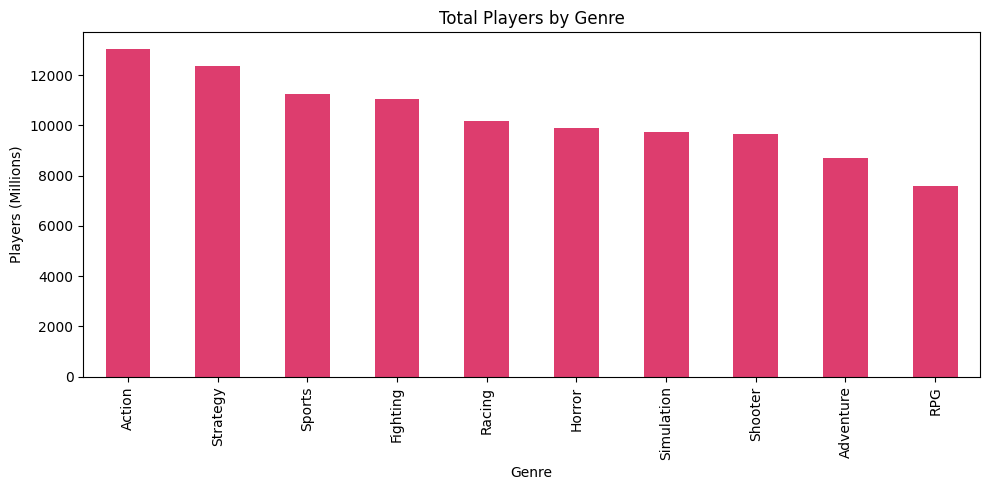

In [28]:
genre_players = df_renamed.groupby('genre')['players_millions'].sum().sort_values(ascending=False)

# Plot 1: Players by Genre
plt.figure(figsize=(10,5))
genre_players.plot(kind="bar", color = "#dd3d6e")
plt.title("Total Players by Genre")
plt.xlabel("Genre")
plt.ylabel("Players (Millions)")
plt.tight_layout()
plt.show()

In [40]:
platform_df = df_renamed[
    (df_renamed['platform'] == 'Nintendo Switch') |
    (df_renamed['platform'] == 'Cross-Platform') |
    (df_renamed['platform'] == 'PlayStation') |
    (df_renamed['platform'] == 'Xbox')
]
platform_players = platform_df.groupby('platform')['players_millions'].sum().sort_values(ascending=False)
platform_players.unique()
platform_players

platform
PlayStation        18408.82
Cross-Platform     18158.33
Xbox               17840.07
Nintendo Switch    15023.83
Name: players_millions, dtype: float64

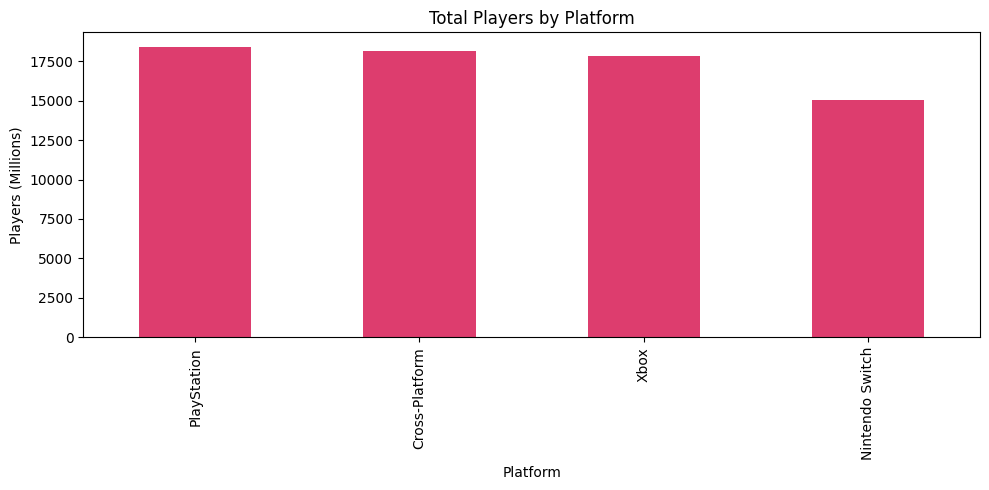

In [41]:
platform_players = platform_df.groupby('platform')['players_millions'].sum().sort_values(ascending=False)

# Plot 2: Players by Console/Platform
plt.figure(figsize=(10,5))
platform_players.plot(kind='bar', color = "#dd3d6e")
plt.title("Total Players by Platform")
plt.xlabel("Platform")
plt.ylabel("Players (Millions)")
plt.tight_layout()
plt.show()

In [38]:
revenue = df_renamed.groupby('platform')["revenue_millions"].sum().sort_values(ascending=False)
volatility = revenue.std()
revenue
#print(volatility)

platform
PC                 426310.75
Cross-Platform     423628.89
PlayStation        415621.64
Xbox               411255.17
Nintendo Switch    407101.45
Mobile             399099.90
Name: revenue_millions, dtype: float64

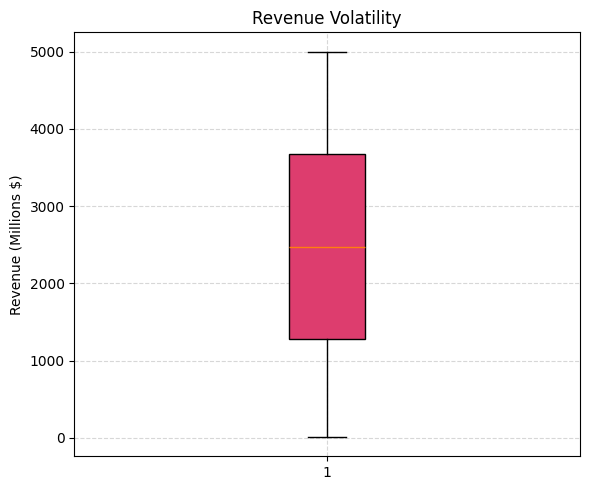

In [15]:
plt.figure(figsize=(6,5))
plt.boxplot(revenue, patch_artist=True, boxprops=dict(facecolor="#dd3d6e"))
plt.title("Revenue Volatility")
plt.ylabel("Revenue (Millions $)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()